<a href="https://colab.research.google.com/github/RojaCM/MACHINE-LEARNING-ROJA/blob/main/simple%20linear%20regression%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#visualizing the data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

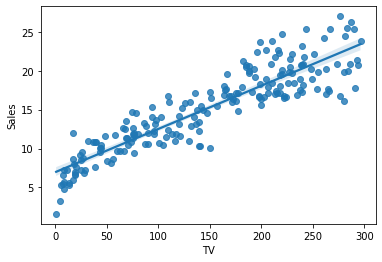

In [13]:
sns.regplot(df.TV,df.Sales)

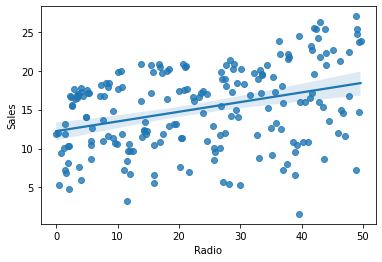

In [14]:
sns.regplot(df.Radio,df.Sales)

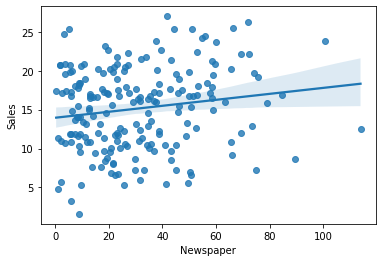

In [15]:
sns.regplot(df.Newspaper,df.Sales)

In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


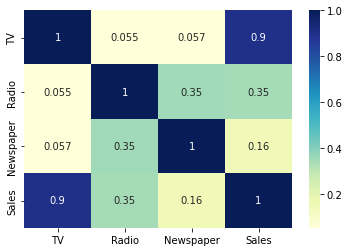

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

SIMPLE LINEAR REGRESSION

In [20]:
import statsmodels
import statsmodels.api as sm

In [21]:
x=df['TV']
y=df['Sales']

In [22]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [23]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


Nuance with stats model - in stats model we will add constant 1 as y intercept 

In [45]:
x_train_sm=sm.add_constant(x_train)

In [46]:
x_train_sm

,const,TV
169,1.0,284.3
97,1.0,184.9
31,1.0,112.9
12,1.0,23.8
35,1.0,290.7
...,...,...
106,1.0,25.0
14,1.0,204.1
92,1.0,217.7
179,1.0,165.6


In [59]:
lm=sm.OLS(y_train,x_train_sm)

In [60]:
lr_model=lm.fit()

In [61]:
lr_model.params

const    7.206555
TV       0.054835
dtype: float64

In [62]:
x_train

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 140, dtype: float64

In [63]:
y_train

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 140, dtype: float64

In [64]:
y_hat=280.2*0.054+7.20

In [65]:
y_hat

22.3308

In [66]:
y_train[102]-y_hat

-2.5307999999999993

In [69]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           5.08e-50
Time:                        13:51:49   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.000       6.387       8.026
TV             0.0548      0.002     23.467      0.000       0.050       0.059
==============================================================================
Omnibus:                        1.138   Durbin-Watson:                   2.351
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.240
Skew:                          -0.190   Prob(JB):                        0.538
Kurtosis:                       2.739   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

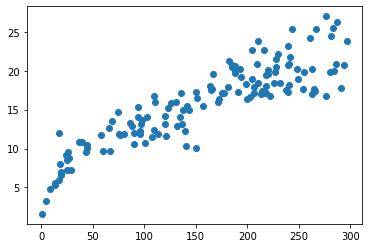

In [70]:
plt.scatter(x_train,y_train)

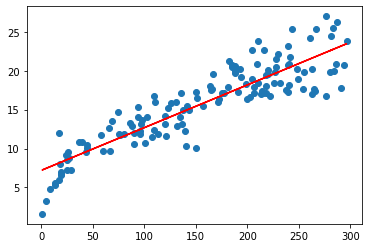

In [71]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.206555+(0.054835)*x_train,'r')

In [75]:
y_train_pred=lr_model.predict(x_train_sm)

In [76]:
residual=y_train-y_train_pred

In [77]:
residual

169   -2.796112
97     3.154475
31    -1.497413
12     0.688375
35    -5.347055
         ...   
106   -1.377427
14     0.601646
92     0.255891
179    1.312789
102   -2.771289
Length: 140, dtype: float64

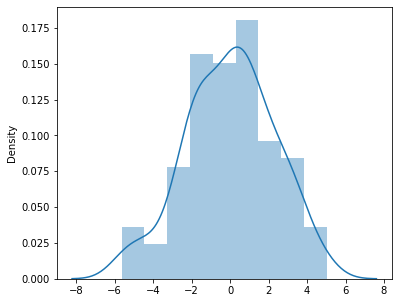

In [79]:
plt.figure(figsize=(6,5))
sns.distplot(residual)

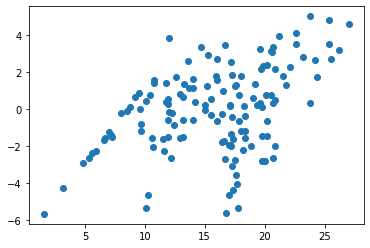

In [81]:
plt.scatter(y_train,residual)


In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
x_test_lm=sm.add_constant(x_test)

In [84]:
y_pred=lr_model.predict((x_test_lm))

In [85]:
rest=y_test-y_pred

In [88]:
mean_squared_error(y_test,y_pred)

5.179525402166655

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.27585706980176

In [90]:
r2_score(y_test,y_pred)

0.814855389208679

linear regression using SKLEARN

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [92]:
lr=LinearRegression()

In [99]:
x=df[['TV']]
y=df[['Sales']]

In [102]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.3,random_state=42)

In [103]:
lr.fit(x1,y1)

LinearRegression()

In [104]:
yp=lr.predict(x2)

In [105]:
yp

array([[16.16109107],
       [17.92129084],
       [23.26769201],
       [ 7.84812269],
       [19.28667945],
       [11.32465432],
       [19.09475735],
       [ 9.94829874],
       [19.4018327 ],
       [16.8081427 ],
       [ 8.93385339],
       [10.28827502],
       [20.0653348 ],
       [ 7.50266292],
       [14.85602084],
       [16.53945177],
       [ 7.6068492 ],
       [18.04192759],
       [11.3356213 ],
       [20.22435596],
       [19.79116038],
       [10.92435967],
       [ 9.29028013],
       [20.96462689],
       [10.99016153],
       [10.14022083],
       [18.91380224],
       [14.84505386],
       [11.98815642],
       [ 7.66716757],
       [18.16256433],
       [11.00112851],
       [18.11321294],
       [ 8.13326408],
       [22.59870643],
       [20.26822387],
       [ 9.85507944],
       [22.21486224],
       [13.63320293],
       [ 8.71451385],
       [13.56740107],
       [16.91232898],
       [ 9.56993804],
       [10.62276781],
       [19.48956852],
       [ 9

In [106]:
lr.coef_

array([[0.05483488]])

In [107]:
lr.intercept_

array([7.20655455])

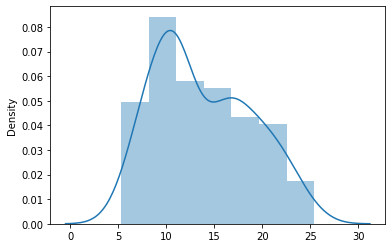

In [110]:
sns.distplot((y2,yp))

In [111]:
r2_score(y2,yp)

0.814855389208679